In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
spams = pd.read_csv('/Users/da_learner_mac_45/Downloads/spam.csv', encoding="latin-1")
#/Users/da_learner_mac_45/Downloads
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spams.shape

(5572, 5)

In [4]:
spams.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Name the columns accordingly

In [5]:
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#print("Count of label:n",spams['label'].value_counts())


In [7]:
non_spam_ratio = round(len(spams[spams['v1'] == 0])/len(spams['v1']) * 100, 2)
spam_ratio = round(len(spams[spams['v1'] == 1])/len(spams['v1']) * 100, 2)

# Print the ratios
print("Not a Spam Email Ratio with label(0):", non_spam_ratio, "%")
print("Spam Email Ratio with label(1):", spam_ratio, "%")

Not a Spam Email Ratio with label(0): 0.0 %
Spam Email Ratio with label(1): 0.0 %


In [8]:
spams['length'] = spams.v2.str.len()
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [9]:
!pip install stopwords



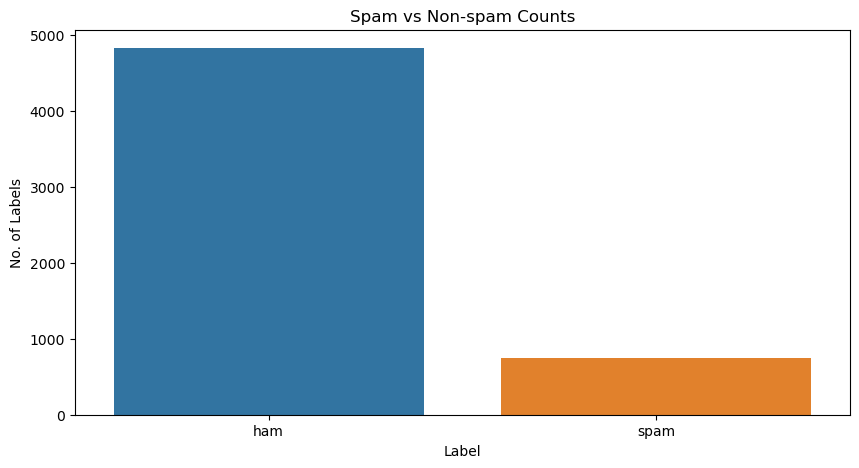

In [10]:

plt.figure(figsize=(10,5))
sns.countplot(x='v1', data=spams)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.title('Spam vs Non-spam Counts')
plt.show()

In [11]:
spams['label'] = spams['v1'].map({'ham': 0, 'spam': 1})
spams['message']=spams['v2']
spams.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','v1','v2'], axis=1, inplace=True)
spams.head()


,length,label,message
0,111,0,"Go until jurong point, crazy.. Available only ..."
1,29,0,Ok lar... Joking wif u oni...
2,155,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,49,0,U dun say so early hor... U c already then say...
4,61,0,"Nah I don't think he goes to usf, he lives aro..."
